In [2]:
#Ladataan tarvittavat kirjastot tähään soluun päivitä lopuksi tätä solua
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os # käytetään tiedostojen käsittelyyn ja hakemistojen hallintaan
from IPython.core.interactiveshell import InteractiveShell # tulostaa useamman tulosteen yhdellä kertaa 
InteractiveShell.ast_node_interactivity="all"
from datetime import datetime # aikaleimojen käsittelyyn 
import calendar # kalenterin käsittelyyn
import warnings # poistaa varoitusilmoitukset 
warnings.filterwarnings("ignore")

In [3]:
processed_data_dir = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed"

processed_files = [f for f in os.listdir(processed_data_dir) if f.endswith('.csv')]

processed_data = {}

for file_name in processed_files:
    file_path = os.path.join(processed_data_dir, file_name)
    key = file_name.replace('.csv', '')
    processed_data[key] = pd.read_csv(file_path)

for key, df in processed_data.items():
    print(f"Loaded '{key}': {df.shape[0]} rows, {df.shape[1]} columns")

Loaded 'cleaned_daily_data': 3510433 rows, 10 columns
Loaded 'cleaned_acorn_details': 398 rows, 20 columns
Loaded 'household_info_processed': 5566 rows, 5 columns
Loaded 'cleaned_weather_daily': 707 rows, 33 columns
Loaded 'acorn_house_merge': 2195021 rows, 9 columns
Loaded 'cleaned_household_info': 5566 rows, 5 columns
Loaded 'cleaned_halfhourly_data': 167817021 rows, 3 columns
Loaded 'cleaned_hhblock_data': 1371160 rows, 55 columns
Loaded 'cleaned_weather_hourly': 21003 rows, 13 columns
Loaded 'cleaned_uk_bank_holidays': 25 rows, 1 columns
Loaded 'acorn_distribution': 37 rows, 3 columns


In [4]:
for key, df in processed_data.items():
    print(f"Dataset: {key}")
    print(f"Shape: {df.shape}")
    print(f"Columns: {df.columns.tolist()}")
    print("Info:")
    print(df.info())
    print("Summary:")
    print(df.describe(include='all'))
    print(f"Null values:\n{df.isnull().sum()}")
    print(f"Duplicated rows: {df.duplicated().sum()}")
    print("\n" + "="*50 + "\n")

Dataset: cleaned_daily_data
Shape: (3510433, 10)
Columns: ['LCLid', 'day', 'energy_median', 'energy_mean', 'energy_max', 'energy_count', 'energy_std', 'energy_sum', 'energy_min', 'energy_range']
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
 9   energy_range   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 267.8+ MB
None
Summary:
            LCLid         day  energy_median   energy_mean    energy_max  \
count     3510433     3510433   3.510433e+06  3.510433e+06  3.510433e+06   
unique       5566         829            NaN           NaN           NaN   
top     MAC000157  2012-12-18            NaN

In [5]:
file_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_household_info.csv"
cleaned_household_info = pd.read_csv(file_path)
print(cleaned_household_info.info())
print(cleaned_household_info.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB
None
            LCLid stdorToU    Acorn Acorn_grouped     file
count        5566     5566     5566          5566     5566
unique       5566        2       19             5      112
top     MAC005492      STD  ACORN-E   High Income  block_0
freq            1     4443     1567          2192       50


Halsuin tutkia miksi Acorn_grouped 'ssa 5 unique value.

In [6]:
print(cleaned_household_info['Acorn'].unique())
print(cleaned_household_info['Acorn_grouped'].unique())

['ACORN-' 'ACORN-A' 'ACORN-B' 'ACORN-C' 'ACORN-D' 'ACORN-E' 'ACORN-F'
 'ACORN-G' 'ACORN-H' 'ACORN-I' 'ACORN-J' 'ACORN-K' 'ACORN-L' 'ACORN-M'
 'ACORN-N' 'ACORN-O' 'ACORN-P' 'ACORN-Q' 'ACORN-U']
['ACORN-' 'High Income' 'Middle Income' 'Low Income' 'ACORN-U']


Näyttää siltä että ACORN- ja ACORN-E ei ole luokiteltu tulotitoissa. Tutkin mikä voi olla syynä.. 

In [7]:
acorn_u_rows = cleaned_household_info[cleaned_household_info['Acorn'] == 'ACORN-U']
acorn_dash_rows = cleaned_household_info[cleaned_household_info['Acorn'] == 'ACORN-']

print(acorn_u_rows['Acorn_grouped'].value_counts())
print(acorn_u_rows.head())

print(acorn_dash_rows['Acorn'].value_counts())
print(acorn_dash_rows.head())

Acorn_grouped
ACORN-U    49
Name: count, dtype: int64
          LCLid stdorToU    Acorn Acorn_grouped       file
5517  MAC003916      TOU  ACORN-U       ACORN-U  block_110
5518  MAC004010      STD  ACORN-U       ACORN-U  block_110
5519  MAC004788      STD  ACORN-U       ACORN-U  block_110
5520  MAC004649      STD  ACORN-U       ACORN-U  block_110
5521  MAC004672      STD  ACORN-U       ACORN-U  block_110
Acorn
ACORN-    2
Name: count, dtype: int64
       LCLid stdorToU   Acorn Acorn_grouped     file
0  MAC005492      TOU  ACORN-        ACORN-  block_0
1  MAC001074      TOU  ACORN-        ACORN-  block_0


ACORN- todennäköisesti paikkamerkki.. Poistan datasetista. ACORN-U liittyvä selvitän myöhemmin yhdistemällä dataa mihin se oikein kuuluu?

In [8]:
cleaned_household_info = cleaned_household_info[cleaned_household_info['Acorn'] != 'ACORN-']

In [9]:
print(cleaned_household_info['Acorn_grouped'].unique())

['High Income' 'Middle Income' 'Low Income' 'ACORN-U']


Olen sevittänyt että isoimmat ryhmät household datassa ACORN-E,Q,F,H,,L. Koitan nyt selvittää onko ryhmillä suhdetta block tietoihin?

In [10]:
acorn_to_group_mapping = cleaned_household_info[['Acorn', 'Acorn_grouped']]
print(acorn_to_group_mapping.sort_values(by='Acorn'))


        Acorn Acorn_grouped
2     ACORN-A   High Income
103   ACORN-A   High Income
104   ACORN-A   High Income
105   ACORN-A   High Income
106   ACORN-A   High Income
...       ...           ...
5536  ACORN-U       ACORN-U
5537  ACORN-U       ACORN-U
5538  ACORN-U       ACORN-U
5527  ACORN-U       ACORN-U
5565  ACORN-U       ACORN-U

[5564 rows x 2 columns]


In [11]:
acorn_to_group_mapping.to_csv("acorn_to_group_mapping.csv", index=False)

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='count', ylabel='Acorn'>

Text(0.5, 1.0, 'ACORN Categories Grouped by ACORN Group')

Text(0.5, 0, 'Count')

Text(0, 0.5, 'ACORN Categories')

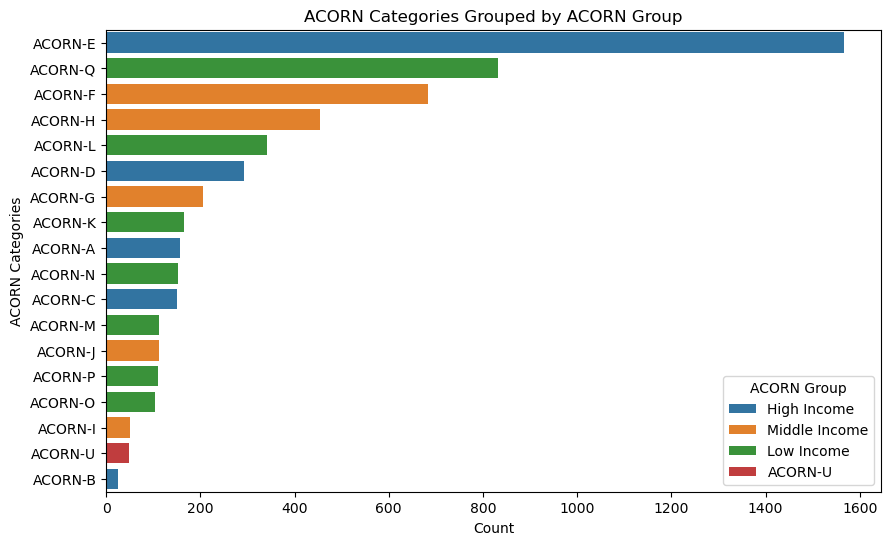

In [12]:
plt.figure(figsize=(10, 6))
sns.countplot(data=cleaned_household_info, y='Acorn', hue='Acorn_grouped', order=cleaned_household_info['Acorn'].value_counts().index)
plt.title("ACORN Categories Grouped by ACORN Group")
plt.xlabel("Count")
plt.ylabel("ACORN Categories")
plt.legend(title="ACORN Group")
plt.show()

In [13]:
pivot = cleaned_household_info.pivot_table(index='Acorn', columns='Acorn_grouped', aggfunc='size', fill_value=0)
print(pivot)

Acorn_grouped  ACORN-U  High Income  Low Income  Middle Income
Acorn                                                         
ACORN-A              0          157           0              0
ACORN-B              0           25           0              0
ACORN-C              0          151           0              0
ACORN-D              0          292           0              0
ACORN-E              0         1567           0              0
ACORN-F              0            0           0            684
ACORN-G              0            0           0            205
ACORN-H              0            0           0            455
ACORN-I              0            0           0             51
ACORN-J              0            0           0            112
ACORN-K              0            0         165              0
ACORN-L              0            0         342              0
ACORN-M              0            0         113              0
ACORN-N              0            0         152        

Tuossa kyllä aika selkeä **'High income'**: A, B, C, D, E **'Mid income'**: F, G, H, I, J **'Low income'**: K, L, M, N, O, P, Q - U ei ole selvitetty vielä.

In [14]:
from scipy.stats import chi2_contingency 

chi2_stat, p_val, dof, expected = chi2_contingency(block_acorn_distribution)
print(f"Chi2 Stat: {chi2_stat}, P-value: {p_val}")

if p_val < 0.05:
    print("Vahva suhde acorn groups, blocks välillä")
else:
    print("ei ole")

NameError: name 'block_acorn_distribution' is not defined

      ACORN                                             Blocks
0   ACORN-A                 block_0, block_1, block_2, block_3
1   ACORN-B                                            block_3
2   ACORN-C                 block_3, block_4, block_5, block_6
3   ACORN-D  block_6, block_7, block_8, block_9, block_10, ...
4   ACORN-E  block_12, block_13, block_14, block_15, block_...
5   ACORN-F  block_43, block_44, block_45, block_46, block_...
6   ACORN-G   block_57, block_58, block_59, block_60, block_61
7   ACORN-H  block_61, block_62, block_63, block_64, block_...
8   ACORN-I                                 block_70, block_71
9   ACORN-J             block_71, block_72, block_73, block_74
10  ACORN-K             block_74, block_75, block_76, block_77
11  ACORN-L  block_77, block_78, block_79, block_80, block_...
12  ACORN-M                       block_84, block_85, block_86
13  ACORN-N             block_86, block_87, block_88, block_89
14  ACORN-O                       block_89, block_90, b

<Axes: xlabel='Acorn'>

Text(0.5, 1.0, 'Number of Blocks for Each ACORN')

Text(0.5, 0, 'ACORN')

Text(0, 0.5, 'Number of Blocks')

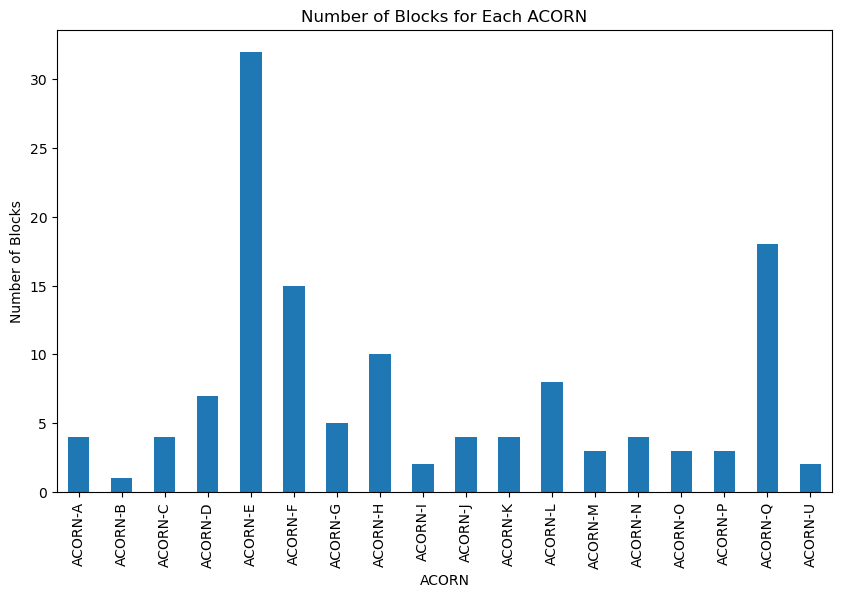

In [ ]:
acorn_block_mapping = cleaned_household_info.groupby('Acorn')['file'].unique()

acorn_block_table = pd.DataFrame({
    'ACORN': acorn_block_mapping.index,
    'Blocks': acorn_block_mapping.values
})

acorn_block_table['Blocks'] = acorn_block_table['Blocks'].apply(lambda x: ', '.join(x))
print(acorn_block_table)

acorn_block_counts = cleaned_household_info.groupby('Acorn')['file'].nunique()

acorn_block_counts.plot(kind='bar', figsize=(10, 6))
plt.title("Number of Blocks for Each ACORN")
plt.xlabel("ACORN")
plt.ylabel("Number of Blocks")
plt.show()


In [ ]:
acorn_block_table.to_csv("acorn_block_mapping.csv", index=False)


Kun oli vahva suhdetta groped ja blocks välillä. Olen yksinkertaisesti selvittänyt missä mitäkin acorn blocks issa ja tallensin jotta voisin jatkossa hyötyä.

In [ ]:
cleaned_acorn_details_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_acorn_details.csv"
cleaned_acorn_details = pd.read_csv(cleaned_acorn_details_path)

print(cleaned_acorn_details.info())
print(cleaned_acorn_details.describe())
print(cleaned_acorn_details.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   MainCategories  398 non-null    object 
 1   SubCategories   398 non-null    object 
 2   Reference       398 non-null    object 
 3   AcornA          398 non-null    float64
 4   AcornB          398 non-null    float64
 5   AcornC          398 non-null    float64
 6   AcornD          398 non-null    float64
 7   AcornE          398 non-null    float64
 8   AcornF          398 non-null    float64
 9   AcornG          398 non-null    float64
 10  AcornH          398 non-null    float64
 11  AcornI          398 non-null    float64
 12  AcornJ          398 non-null    float64
 13  AcornK          398 non-null    float64
 14  AcornL          398 non-null    float64
 15  AcornM          398 non-null    float64
 16  AcornN          398 non-null    float64
 17  AcornO          398 non-null    flo

In [ ]:
print(cleaned_acorn_details['MainCategories'].unique())
print(cleaned_acorn_details['SubCategories'].unique())

['Population' 'Family' 'Economy' 'Education' 'Health' 'Transport'
 'Marketing Channels' 'Finance' 'Digital' 'Shopping' 'Environment'
 'Community Safety' 'Leisure Time']
['Age' 'Geography' 'Ethnicity' 'Country Of Birth' 'Religion' 'Structure'
 'Children In Household' 'Household Size' 'Economic Activity'
 'Social Grade' 'Highest Level Of Qualifications (Adults)'
 'England: Pupils At The End Of Ks1' 'England: Pupils At The End Of Ks2'
 'England: Pupils At The End Of Ks4' 'Behaviours & Lifestyle'
 'Travel To Work' 'Channels Received' 'Future Responses'
 'Financial Attitudes' 'Financial Situation' 'Credit Cards'
 'Savings And Investments' 'Loans' 'Insurance And Pensions'
 'Financial Channel: Arrange Commoditised Financial Product'
 'Financial Channel: Manage Current Account'
 'Financial Channel: Manage Savings Account'
 'Expenditure Per Person Per Week' 'Internet Access: Frequency'
 'Internet Access: Usage In Last Week' 'Digital Attitudes'
 'Technology At Home' 'Tv On Demand' 'Mobile Phone'

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Population')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Family')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Economy')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Education')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Health')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Transport')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Marketing Channels')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Finance')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Digital')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Shopping')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Environment')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Community Safety')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Leisure Time')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

Text(0.5, 1.02, 'Distribution of Main Categories Across ACORN Groups')

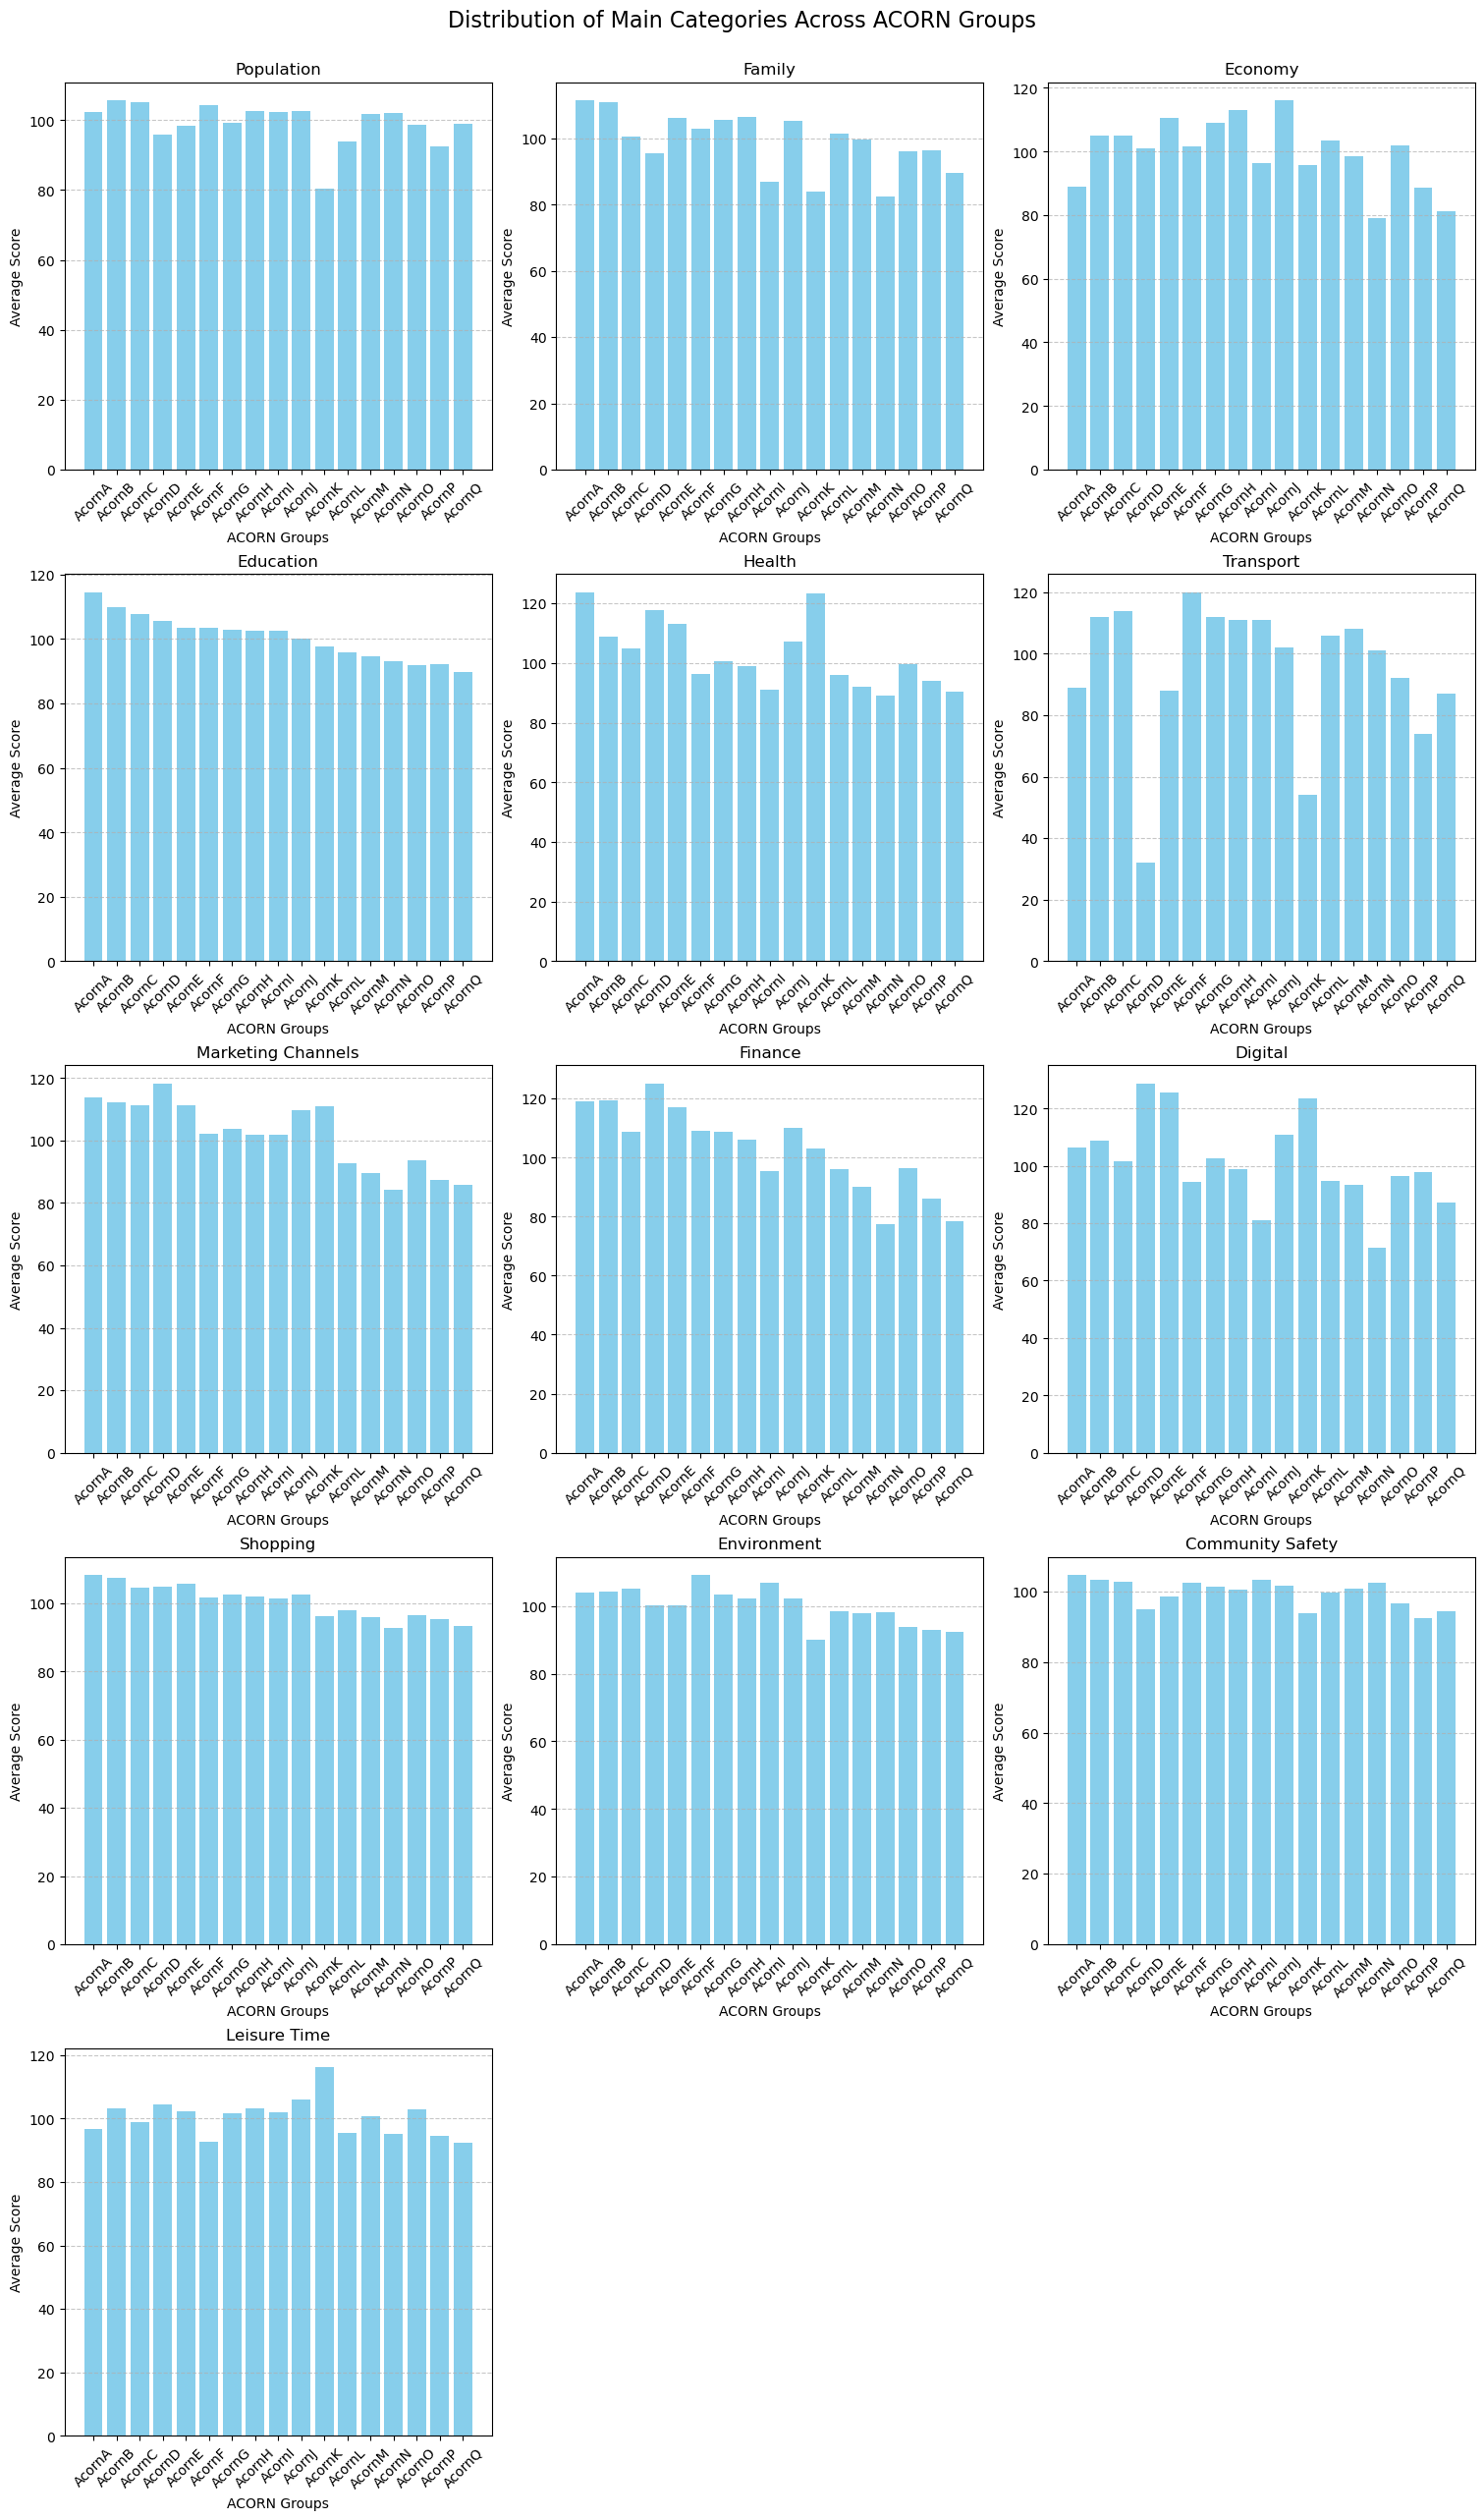

In [ ]:
import math
main_categories = cleaned_acorn_details['MainCategories'].unique()

acorn_columns = [col for col in cleaned_acorn_details.columns if col.startswith('Acorn')]

n_categories = len(main_categories)
n_cols = 3
n_rows = math.ceil(n_categories / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

axes = axes.flatten()

for idx, category in enumerate(main_categories):
    category_data = cleaned_acorn_details[cleaned_acorn_details['MainCategories'] == category]
    category_acorn_data = category_data[acorn_columns].mean()  # Mean values for each ACORN group
    
    axes[idx].bar(category_acorn_data.index, category_acorn_data.values, color='skyblue')
    axes[idx].set_title(f'{category}')
    axes[idx].set_xlabel('ACORN Groups')
    axes[idx].set_ylabel('Average Score')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
  
for ax in axes[n_categories:]:
    fig.delaxes(ax)

fig.suptitle('Distribution of Main Categories Across ACORN Groups', fontsize=16, y=1.02)
plt.show()


**Alhaisemmat ryhmät**: ACORN-Q, ACORN-P, and ACORN-K näyttävät alhaisemmat pisteet, kuten Education, Health, Finance, and Transport.
**Korkeammat ryhmät**: ACORN-I and ACORN-J näyttävät korkeampia pisteitä Digital ja Health, mikä osoittaa vahvuuksia.


<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Age')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Geography')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Ethnicity')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Country Of Birth')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Religion')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Structure')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Children In Household')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Household Size')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Economic Activity')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Social Grade')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Highest Level Of Qualifications (Adults)')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'England: Pupils At The End Of Ks1')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'England: Pupils At The End Of Ks2')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'England: Pupils At The End Of Ks4')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Behaviours & Lifestyle')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Travel To Work')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Channels Received')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Future Responses')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Financial Attitudes')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Financial Situation')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Credit Cards')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Savings And Investments')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Loans')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Insurance And Pensions')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Financial Channel: Arrange Commoditised Financial Product')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Financial Channel: Manage Current Account')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Financial Channel: Manage Savings Account')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Expenditure Per Person Per Week')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Internet Access: Frequency')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Internet Access: Usage In Last Week')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Digital Attitudes')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Technology At Home')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Tv On Demand')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Mobile Phone')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Smartphone Brand')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Tablet Devices')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Social Media Activity (At Least Weekly)')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Social Media Brands (Used At Least Weekly)')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Number Of Apps On Mobile Phone (Free Or Paid)')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Types Of Internet Usage : Laptop Or Pc')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Types Of Internet Usage : Mobile Phone')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Types Of Internet Usage : Tablet / Ipad')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Regularly Research On The Internet')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Purchased On The Internet')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Sites Regularly Visited')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Preferred Supermarket')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Food Shopping')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Clothing & Footwear Stores')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Furniture & Fittings Stores')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Electrical Stores')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Attitudes')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Action')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Attitude')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Crime Survey For England')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Magazines Read')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Books Read')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Interests & Hobbies')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Visit Pubs For A Drink - Evening')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Visit Pubs For A Meal - Day')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Visit Pubs For A Meal - Evening')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

<BarContainer object of 17 artists>

Text(0.5, 1.0, 'Holiday Destination/Type')

Text(0.5, 0, 'ACORN Groups')

Text(0, 0.5, 'Average Score')

Text(0.5, 1.02, 'Distribution of Sub Categories Across ACORN Groups')

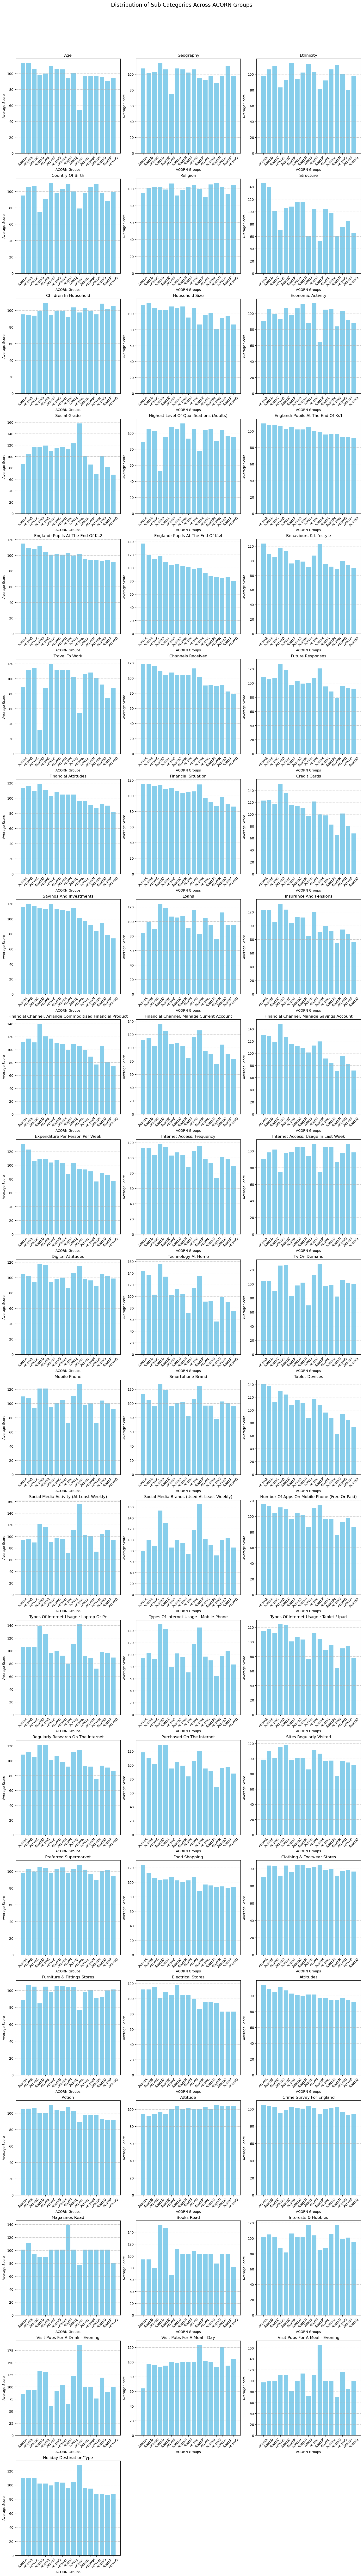

In [ ]:
sub_categories = cleaned_acorn_details['SubCategories'].unique()

acorn_columns = [col for col in cleaned_acorn_details.columns if col.startswith('Acorn')]

n_categories = len(sub_categories)
n_cols = 3
n_rows = math.ceil(n_categories / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

axes = axes.flatten()

for idx, category in enumerate(sub_categories):
    category_data = cleaned_acorn_details[cleaned_acorn_details['SubCategories'] == category]
    category_acorn_data = category_data[acorn_columns].mean()  # Mean values for each ACORN group
    
    axes[idx].bar(category_acorn_data.index, category_acorn_data.values, color='skyblue')
    axes[idx].set_title(f'{category}')
    axes[idx].set_xlabel('ACORN Groups')
    axes[idx].set_ylabel('Average Score')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

for ax in axes[n_categories:]:
    fig.delaxes(ax)

fig.suptitle('Distribution of Sub Categories Across ACORN Groups', fontsize=16, y=1.02)
plt.show()


**EDUCATION**: ACORN-P JA ACORN-Q 'lla koulutksen osalta alhaiset pisteet.
**DIGITAL**: ACORN-I JA ACORN-K '' lla on teknologian käytön osalta korkeat pisteet.
ACORN-P JA ACORN-Q 'lla taas alhaiset pisteet teknologian käytön osalta.
**FINANCE**: ACORN-O JA ACORN-K lla alhaiset pisteet rahoituksen osalta.
**TRANSPORT**: ACORN-Q 'lla kuljetuksen osalta alhaiset pisteet.


## ACORN-ryhmien Vahvuudet ja Heikkoudet

| ACORN-ryhmä | Vahvuudet                                   | Heikkoudet                               |
|-------------|---------------------------------------------|------------------------------------------|
| ACORN-A     | Koulutus, Digitaalinen, Rahoitus            | Liikenne                                |
| ACORN-B     | Vapaa-aika, Ostokset                       | Terveys                                 |
| ACORN-C     | Koulutus, Rahoitus                         | Ympäristö                               |
| ACORN-D     | Yhteisön turvallisuus, Digitaalinen         | Liikenne                                |
| ACORN-E     | Terveys, Koulutus                          | Rahoitus                                |
| ACORN-F     | Digitaalinen, Rahoitus                     | Vapaa-aika                              |
| ACORN-G     | Koulutus, Ostokset                         | Terveys                                 |
| ACORN-H     | Ympäristö, Liikenne                        | Rahoitus                                |
| ACORN-I     | Digitaalinen, Terveys                      | Ympäristö                               |
| ACORN-J     | Rahoitus, Ostokset                         | Koulutus                                |
| ACORN-K     | Vapaa-aika, Terveys                        | Rahoitus                                |
| ACORN-L     | Yhteisön turvallisuus, Koulutus            | Ympäristö                               |
| ACORN-M     | Ostokset, Liikenne                         | Digitaalinen                            |
| ACORN-N     | Terveys, Ympäristö                         | Rahoitus                                |
| ACORN-O     | Koulutus, Ostokset                         | Digitaalinen                            |
| ACORN-P     | Yhteisön turvallisuus, Ympäristö           | Terveys, Koulutus                       |
| ACORN-Q     | Yhteisön turvallisuus, Ostokset            | Digitaalinen, Koulutus                  |
| ACORN-U     | Ympäristö, Terveys                         | Digitaalinen, Koulutus                  |

In [ ]:
household_info_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_household_info.csv"
acorn_details_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_acorn_details.csv"

cleaned_household_info = pd.read_csv(household_info_path)
cleaned_acorn_details = pd.read_csv(acorn_details_path)

acorn_columns = [col for col in cleaned_acorn_details.columns if col.startswith('Acorn')]

acorn_details_long = cleaned_acorn_details.melt(
    id_vars=["MainCategories", "SubCategories", "Reference"],
    value_vars=acorn_columns,
    var_name="AcornType",
    value_name="AcornValue"
)

acorn_details_long["AcornType"] = acorn_details_long["AcornType"].str.replace("Acorn", "ACORN-")
cleaned_household_info["Acorn"] = cleaned_household_info["Acorn"].str.strip()

acorn_house_merge = pd.merge(
    cleaned_household_info,
    acorn_details_long,
    left_on="Acorn",
    right_on="AcornType",
    how="left"
)

acorn_house_merge = acorn_house_merge.drop(columns=["AcornType"])

merged_file_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/acorn_house_merge.csv"
acorn_house_merge.to_csv(merged_file_path, index=False)

print(acorn_house_merge.head())

       LCLid stdorToU    Acorn Acorn_grouped     file MainCategories  \
0  MAC005492      TOU   ACORN-        ACORN-  block_0            NaN   
1  MAC001074      TOU   ACORN-        ACORN-  block_0            NaN   
2  MAC000002      STD  ACORN-A   High Income  block_0     Population   
3  MAC000002      STD  ACORN-A   High Income  block_0     Population   
4  MAC000002      STD  ACORN-A   High Income  block_0     Population   

  SubCategories  Reference  AcornValue  
0           NaN        NaN         NaN  
1           NaN        NaN         NaN  
2           Age  Age 35-49       102.0  
3           Age  Age 50-64       124.0  
4     Geography    England       107.0  


<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Population')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Family')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Economy')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Education')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Health')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Transport')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Marketing Channels')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Finance')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Digital')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Shopping')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Environment')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Community Safety')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

<BarContainer object of 3 artists>

Text(0.5, 1.0, 'Leisure Time')

Text(0.5, 0, 'Acorn Grouped')

Text(0, 0.5, 'Count')

Text(0.5, 1.02, 'Distribution of Main Categories Across Acorn Grouped')

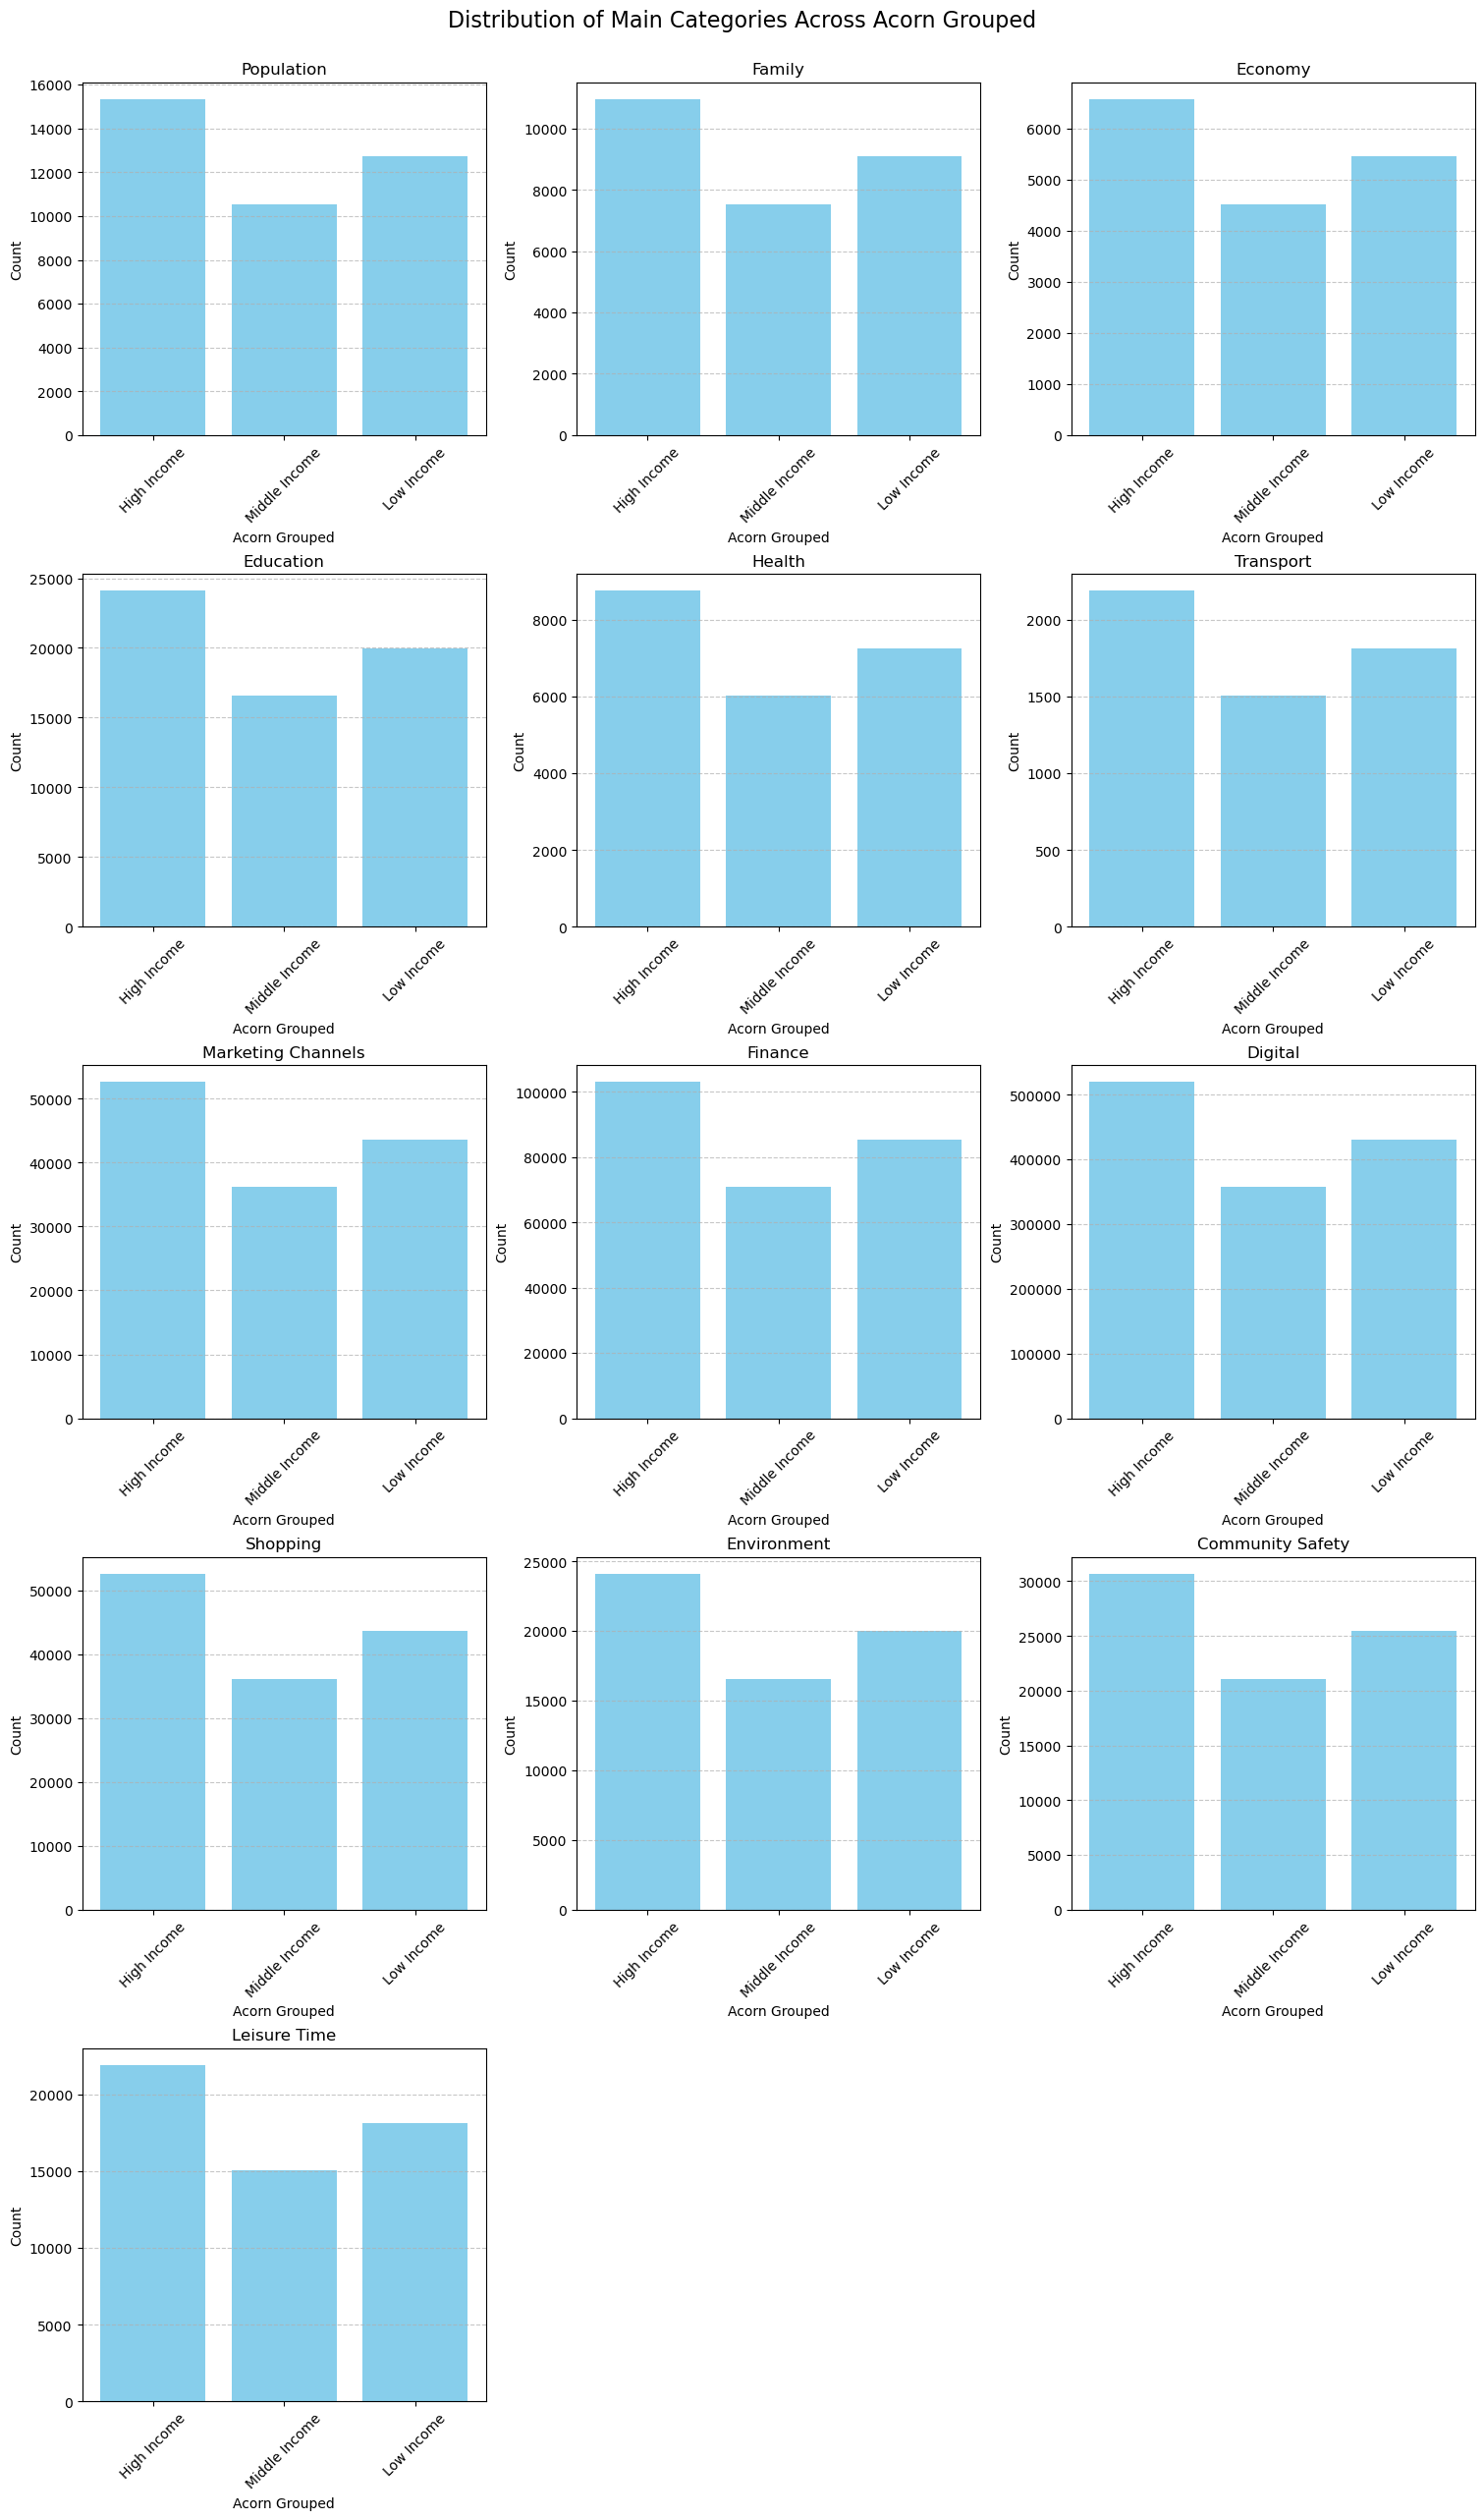

In [ ]:

main_categories = cleaned_acorn_details['MainCategories'].unique()

acorn_grouped_columns = ['High Income', 'Middle Income', 'Low Income']

n_categories = len(main_categories)
n_cols = 3
n_rows = math.ceil(n_categories / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)

axes = axes.flatten()

for idx, category in enumerate(main_categories):
    category_data = acorn_house_merge[acorn_house_merge['MainCategories'] == category]
    
    category_acorn_grouped_data = category_data.groupby('Acorn_grouped').size()
    
    category_acorn_grouped_data = category_acorn_grouped_data.reindex(acorn_grouped_columns, fill_value=0)
    
    axes[idx].bar(category_acorn_grouped_data.index, category_acorn_grouped_data.values, color='skyblue')
    axes[idx].set_title(f'{category}')
    axes[idx].set_xlabel('Acorn Grouped')
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)

for ax in axes[n_categories:]:
    fig.delaxes(ax)

fig.suptitle('Distribution of Main Categories Across Acorn Grouped', fontsize=16, y=1.02)
plt.show()


## Tulo- ja ACORN-ryhmien Käyttö Tärkeimmissä Kategorioissa

| **Kategoria**         | **Eniten Käyttävä Tulo** | **Vähiten Käyttävä Tulo** | **Eniten Käyttävä ACORN** | **Vähiten Käyttävä ACORN** |
|------------------------|--------------------------|---------------------------|---------------------------|----------------------------|
| **Rahoitus**          | Korkea tulotaso          | Matala tulotaso           | ACORN-B                   | ACORN-U                    |
| **Digitaalisuus**      | Korkea tulotaso          | Matala tulotaso           | ACORN-C                   | ACORN-U                    |
| **Perhe**             | Keskitulotaso            | Matala tulotaso           | ACORN-A                   | ACORN-U                    |
| **Koulutus**          | Korkea tulotaso          | Matala tulotaso           | ACORN-A                   | ACORN-Q                    |
| **Terveys**           | Matala tulotaso          | Korkea tulotaso           | ACORN-E                   | ACORN-L                    |
| **Liikenne**          | Matala tulotaso          | Korkea tulotaso           | ACORN-O                   | ACORN-K                    |
| **Ympäristö**         | Keskitulotaso            | Matala tulotaso           | ACORN-H                   | ACORN-Q                    |
| **Yhteisön turvallisuus** | Keskitulotaso        | Korkea tulotaso           | ACORN-J                   | ACORN-U                    |
| **Ostoskanavat**      | Korkea tulotaso          | Matala tulotaso           | ACORN-F                   | ACORN-U                    |
| **Vapaa-aika**        | Korkea tulotaso          | Matala tulotaso           | ACORN-C                   | ACORN-U                    |

## Yhteenveto
- **Korkeat tulot**: Hyödyntävät eniten **Rahoitusta**, **Digitaalisuutta** ja **Koulutusta**.
- **Keskitulot**: Tasapainoinen käyttö; erityisesti **Perhe** ja **Ympäristö** korostuvat.
- **Matala tulotaso**: Käyttö keskittyy **Terveys**, **Liikenne** ja **Yhteisön turvallisuus** -kategorioihin.

Text(0.5, 1.02, 'Heatmaps for Main/Sub Categories vs Acorns/Groups')

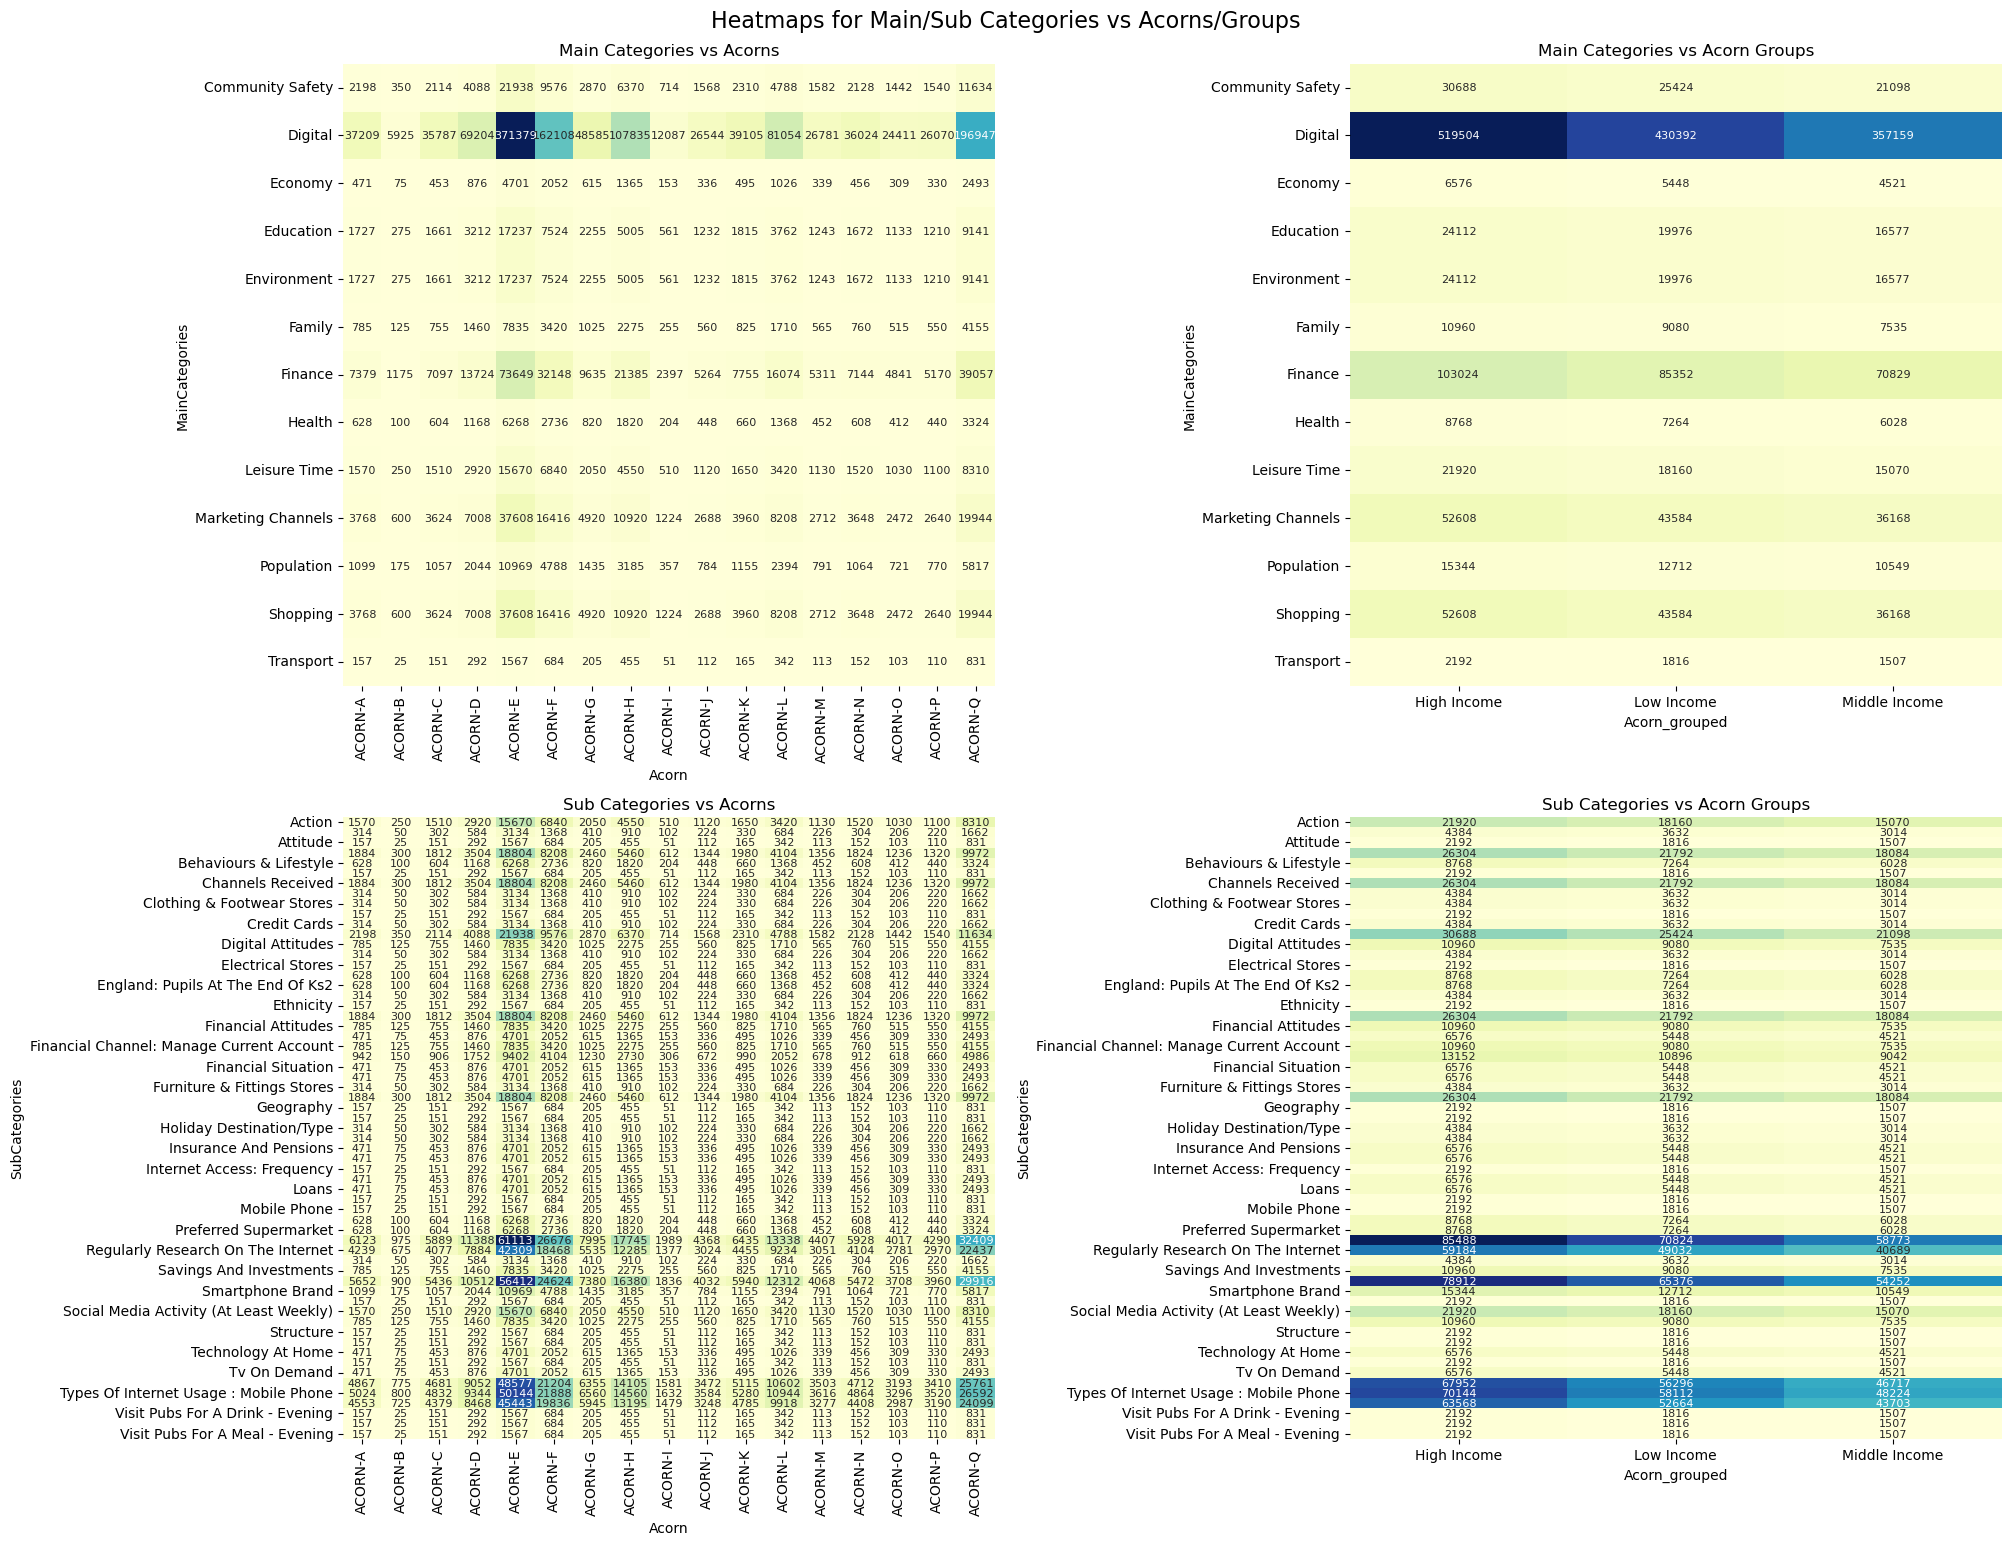

In [ ]:
def plot_heatmap(data, rows, columns, title, ax):
    heatmap_data = data.pivot_table(index=rows, columns=columns, aggfunc='size', fill_value=0)
    sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", ax=ax, cbar=False, annot_kws={"size": 8})
    ax.set_title(title, fontsize=12)
    ax.set_xlabel(columns, fontsize=10)
    ax.set_ylabel(rows, fontsize=10)

fig, axes = plt.subplots(2, 2, figsize=(20, 15), constrained_layout=True)

plot_heatmap(acorn_house_merge, 
             rows="MainCategories", 
             columns="Acorn", 
             title="Main Categories vs Acorns", 
             ax=axes[0, 0])

plot_heatmap(acorn_house_merge[acorn_house_merge['Acorn_grouped'] != 'ACORN-'], 
             rows="MainCategories", 
             columns="Acorn_grouped", 
             title="Main Categories vs Acorn Groups", 
             ax=axes[0, 1])

plot_heatmap(acorn_house_merge, 
             rows="SubCategories", 
             columns="Acorn", 
             title="Sub Categories vs Acorns", 
             ax=axes[1, 0])

plot_heatmap(acorn_house_merge[acorn_house_merge['Acorn_grouped'] != 'ACORN-'], 
             rows="SubCategories", 
             columns="Acorn_grouped", 
             title="Sub Categories vs Acorn Groups", 
             ax=axes[1, 1])

fig.suptitle("Heatmaps for Main/Sub Categories vs Acorns/Groups", fontsize=16, y=1.02)
plt.show()


<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x167ed0d00>,
 [Text(-0.9650089861069286, 0.5279750531349731, 'ACORN-A'),
  Text(-1.094170090232732, 0.11310090026208908, 'ACORN-B'),
  Text(-1.055302964861655, -0.31037985172075955, 'ACORN-C'),
  Text(-0.8438622830819102, -0.705617776981126, 'ACORN-D'),
  Text(-0.46520464718112675, -0.9967871569402786, 'ACORN-E'),
  Text(-0.04483619532083385, -1.0990858545123543, 'ACORN-F'),
  Text(0.35402872573460076, -1.0414718725701309, 'ACORN-G'),
  Text(0.708801367377928, -0.8411900032710682, 'ACORN-H'),
  Text(0.9515841656643859, -0.5518039286348141, 'ACORN-I'),
  Text(1.0850428212899612, -0.18078184634282748, 'ACORN-J'),
  Text(1.0678571834628352, 0.2639716570520805, 'ACORN-K'),
  Text(0.8921114882801896, 0.643534841697406, 'ACORN-L'),
  Text(0.6216109997428367, 0.9075239748892098, 'ACORN-M'),
  Text(0.3110309978105021, 1.0551112350842464, 'ACORN-N'),
  Text(-0.03514725274928428, 1.0994383432572188, 'ACORN-O'),
  Text(-0.40897434050121334, 1.021146409096951, 'ACOR

Text(0.5, 1.0, 'Mean Distribution of ACORN Types - STD')

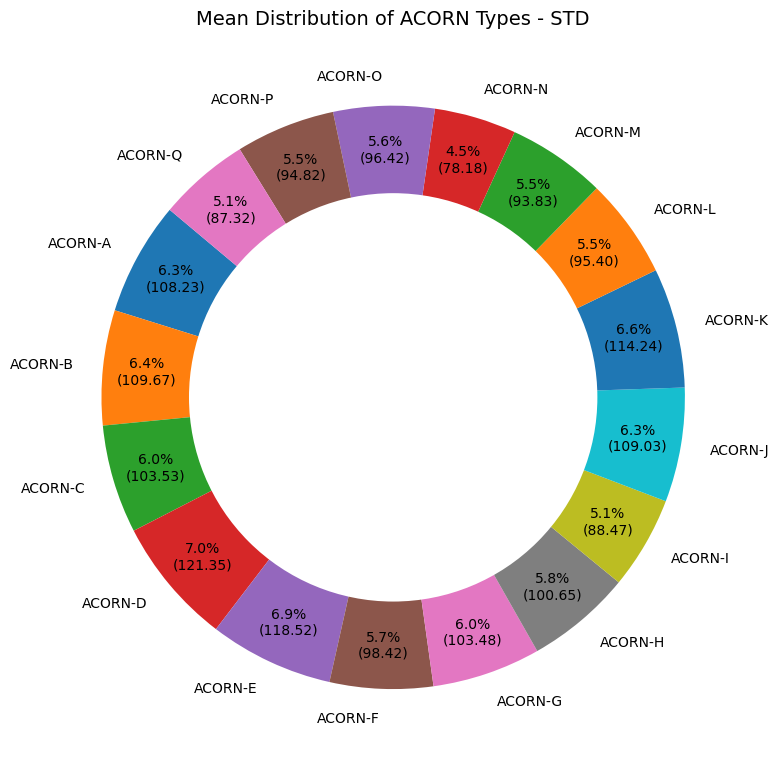

<Figure size 800x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x16802a6d0>,
 [Text(-0.9650089861069286, 0.5279750531349731, 'ACORN-A'),
  Text(-1.094170090232732, 0.11310090026208908, 'ACORN-B'),
  Text(-1.055302964861655, -0.31037985172075955, 'ACORN-C'),
  Text(-0.8438622830819102, -0.705617776981126, 'ACORN-D'),
  Text(-0.46520464718112675, -0.9967871569402786, 'ACORN-E'),
  Text(-0.04483619532083385, -1.0990858545123543, 'ACORN-F'),
  Text(0.35402872573460076, -1.0414718725701309, 'ACORN-G'),
  Text(0.708801367377928, -0.8411900032710682, 'ACORN-H'),
  Text(0.9515841656643859, -0.5518039286348141, 'ACORN-I'),
  Text(1.0850428212899612, -0.18078184634282748, 'ACORN-J'),
  Text(1.0678571834628352, 0.2639716570520805, 'ACORN-K'),
  Text(0.8921114882801896, 0.643534841697406, 'ACORN-L'),
  Text(0.6216109997428367, 0.9075239748892098, 'ACORN-M'),
  Text(0.3110309978105021, 1.0551112350842464, 'ACORN-N'),
  Text(-0.03514725274928428, 1.0994383432572188, 'ACORN-O'),
  Text(-0.40897434050121334, 1.021146409096951, 'ACOR

Text(0.5, 1.0, 'Mean Distribution of ACORN Types - TOU')

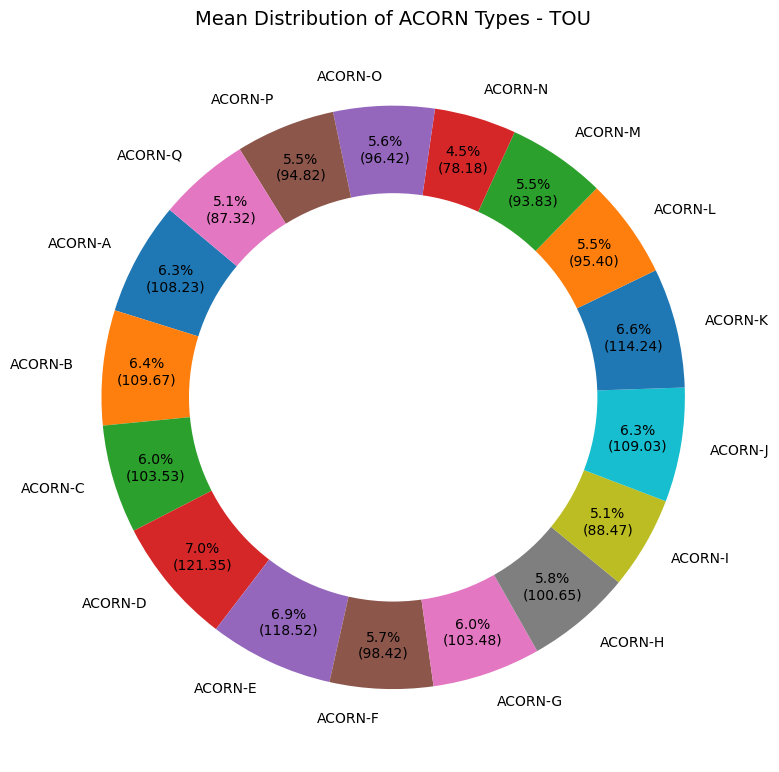

In [ ]:
acorn_distribution_mean = (
    acorn_house_merge.groupby(['Acorn', 'stdorToU'])['AcornValue']
    .mean()
    .reset_index()
    .dropna()  # Drop rows with NaN values
)

acorn_distribution_mean.columns = ['Acorn', 'stdorToU', 'Mean_AcornValue']

for stdorToU in acorn_distribution_mean['stdorToU'].unique():
    subset = acorn_distribution_mean[acorn_distribution_mean['stdorToU'] == stdorToU]
    
    labels = subset['Acorn']
    sizes = subset['Mean_AcornValue']
    
    plt.figure(figsize=(8, 8))
    plt.pie(
        sizes, labels=labels, 
        autopct=lambda p: f'{p:.1f}%\n({p * sum(sizes) / 100:.2f})',
        startangle=140, textprops={'fontsize': 10}, pctdistance=0.85
    )
    
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    plt.gca().add_artist(center_circle)
    
    plt.title(f'Mean Distribution of ACORN Types - {stdorToU}', fontsize=14)
    
    plt.tight_layout()
    plt.show()

In [ ]:
cleaned_weather_daily_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_weather_daily.csv"
cleaned_weather_daily = pd.read_csv(cleaned_weather_daily_path)

print(cleaned_weather_daily.info())
print(cleaned_weather_daily.describe())
print(cleaned_weather_daily.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 707 entries, 0 to 706
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TempMax                      707 non-null    float64
 1   temperatureMaxTime           707 non-null    object 
 2   windBearing                  707 non-null    int64  
 3   icon                         707 non-null    object 
 4   dewPoint                     707 non-null    float64
 5   temperatureMinTime           707 non-null    object 
 6   CloudCover                   707 non-null    float64
 7   WindSpeed                    707 non-null    float64
 8   pressure                     707 non-null    float64
 9   apparentTemperatureMinTime   707 non-null    object 
 10  apparentTemperatureHigh      707 non-null    float64
 11  PrecipitationType            707 non-null    object 
 12  visibility                   707 non-null    float64
 13  Humidity            

<Figure size 1200x1000 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Heatmap of Correlations')

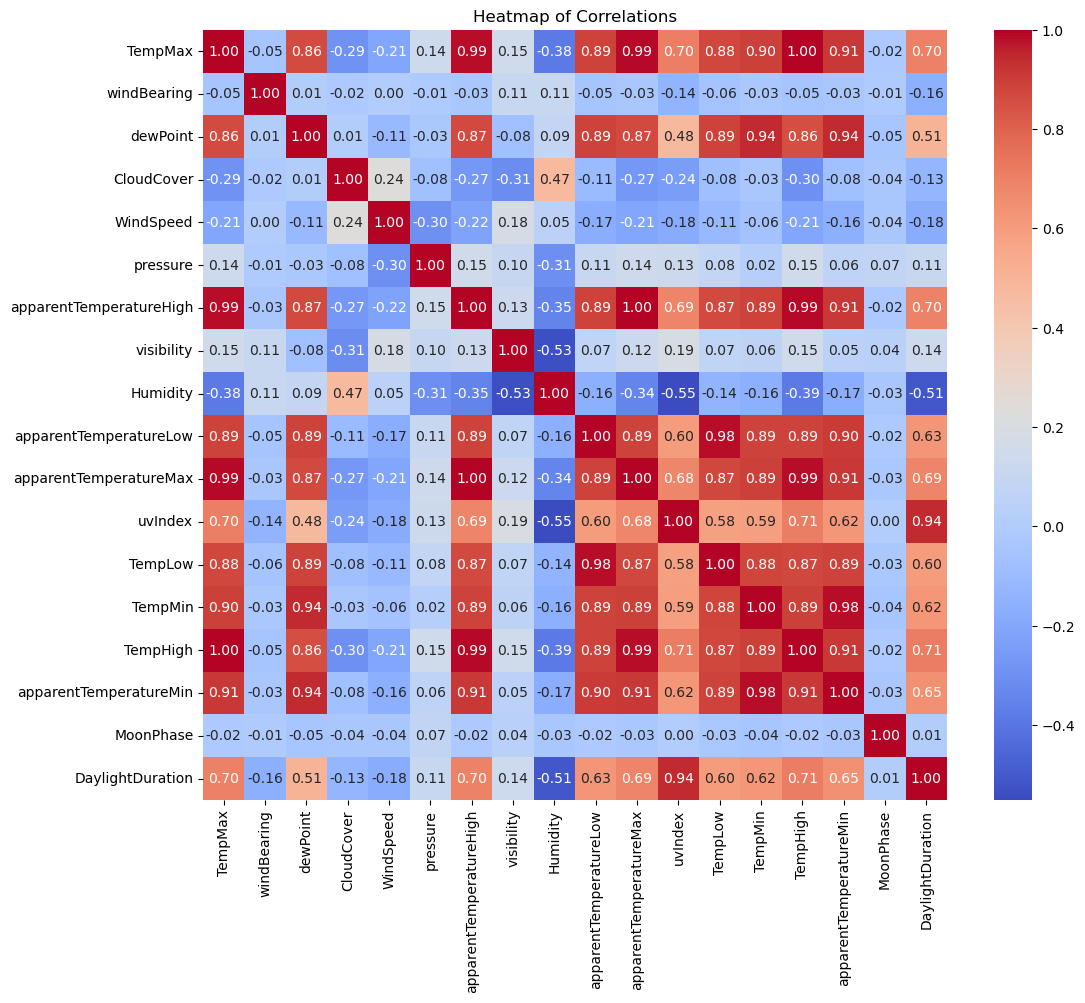

In [ ]:
numeric_columns = cleaned_weather_daily.select_dtypes(include=[np.number])

correlation_matrix = numeric_columns.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Heatmap of Correlations")
plt.show()

Text(0.5, 1.0, 'Peaks in TempMax')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TempMax')

Text(0.5, 1.0, 'Peaks in windBearing')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'windBearing')

Text(0.5, 1.0, 'Peaks in dewPoint')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'dewPoint')

Text(0.5, 1.0, 'Peaks in CloudCover')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'CloudCover')

Text(0.5, 1.0, 'Peaks in WindSpeed')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'WindSpeed')

Text(0.5, 1.0, 'Peaks in pressure')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'pressure')

Text(0.5, 1.0, 'Peaks in apparentTemperatureHigh')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'apparentTemperatureHigh')

Text(0.5, 1.0, 'Peaks in visibility')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'visibility')

Text(0.5, 1.0, 'Peaks in Humidity')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Humidity')

Text(0.5, 1.0, 'Peaks in apparentTemperatureLow')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'apparentTemperatureLow')

Text(0.5, 1.0, 'Peaks in apparentTemperatureMax')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'apparentTemperatureMax')

Text(0.5, 1.0, 'Peaks in uvIndex')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'uvIndex')

Text(0.5, 1.0, 'Peaks in TempLow')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TempLow')

Text(0.5, 1.0, 'Peaks in TempMin')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TempMin')

Text(0.5, 1.0, 'Peaks in TempHigh')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'TempHigh')

Text(0.5, 1.0, 'Peaks in apparentTemperatureMin')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'apparentTemperatureMin')

Text(0.5, 1.0, 'Peaks in MoonPhase')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'MoonPhase')

Text(0.5, 1.0, 'Peaks in DaylightDuration')

Text(0.5, 0, 'Date')

Text(0, 0.5, 'DaylightDuration')

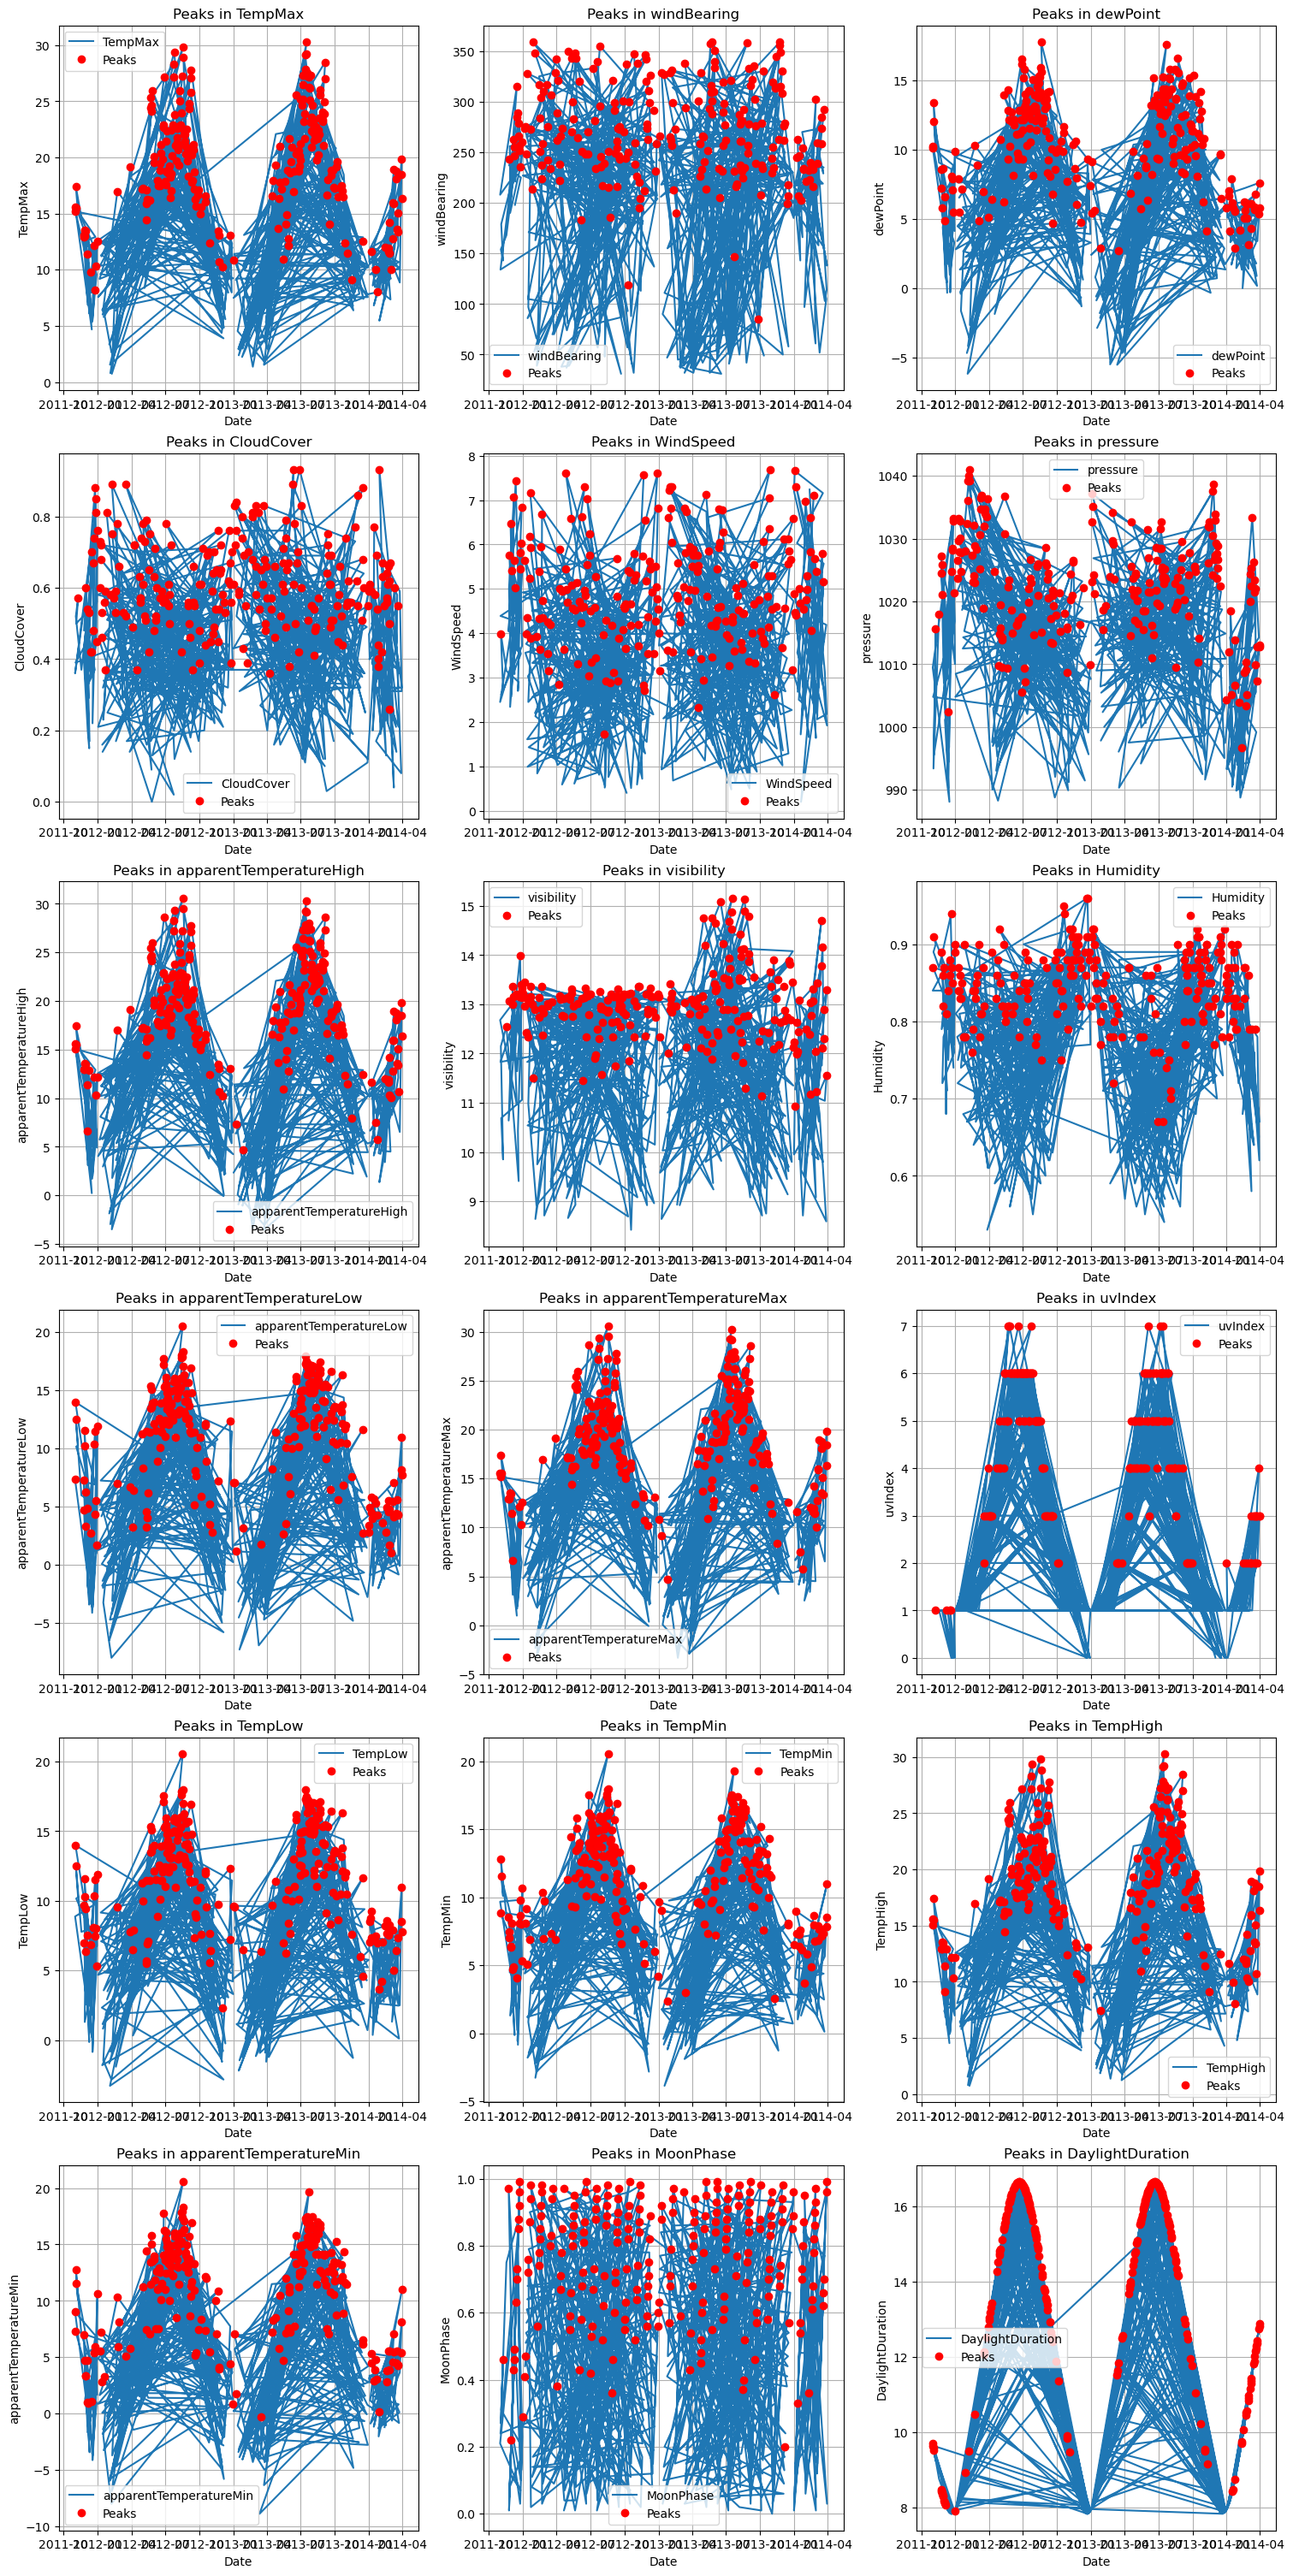

In [ ]:
from scipy.signal import find_peaks
cleaned_weather_daily['Date'] = pd.to_datetime(cleaned_weather_daily['Date'])
columns_to_check = cleaned_weather_daily.select_dtypes(include=[np.number]).columns

peaks_data = {}
n_cols = 3
n_rows = (len(columns_to_check) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows), constrained_layout=True)
axes = axes.flatten()

for idx, column in enumerate(columns_to_check):
    values = cleaned_weather_daily[column].values
    peaks, _ = find_peaks(values)
    peaks_data[column] = cleaned_weather_daily.loc[peaks, ['Date', column]]
    axes[idx].plot(cleaned_weather_daily['Date'], values, label=column)
    axes[idx].plot(cleaned_weather_daily.loc[peaks, 'Date'], values[peaks], 'ro', label='Peaks')
    axes[idx].set_title(f"Peaks in {column}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel(column)
    axes[idx].legend()
    axes[idx].grid()

for ax in axes[len(columns_to_check):]:
    fig.delaxes(ax)

plt.show()


In [ ]:
unique_icons = cleaned_weather_daily['icon'].unique()
unique_summaries = cleaned_weather_daily['summary'].unique()
unique_precipitation = cleaned_weather_daily['PrecipitationType'].unique()
print("Unique values in 'icon':", len(unique_icons))
print("Icons:", unique_icons)
print("\nUnique values in 'summary':", len(unique_summaries))
print("Summaries:", unique_summaries)
print("Unique Values PrecipitationType: ", len(unique_precipitation))
print("PrecipitationType ", unique_precipitation)

Unique values in 'icon': 6
Icons: ['partly-cloudy-day' 'wind' 'partly-cloudy-night' 'fog' 'clear-day'
 'cloudy']

Unique values in 'summary': 72
Summaries: ['Partly cloudy throughout the day.' 'Mostly cloudy throughout the day.'
 'Partly cloudy throughout the day and breezy overnight.'
 'Partly cloudy throughout the day and breezy in the morning.'
 'Partly cloudy throughout the day and breezy starting in the evening.'
 'Partly cloudy until evening.'
 'Partly cloudy starting in the afternoon, continuing until evening.'
 'Breezy in the morning and partly cloudy throughout the day.'
 'Partly cloudy throughout the day and breezy until afternoon.'
 'Breezy and mostly cloudy throughout the day.' 'Foggy overnight.'
 'Mostly cloudy throughout the day and breezy overnight.'
 'Partly cloudy until afternoon.'
 'Mostly cloudy until evening and breezy starting in the afternoon, continuing until evening.'
 'Breezy in the morning and partly cloudy until afternoon.'
 'Breezy in the afternoon.'
 'Partl

<Axes: ylabel='count'>

Text(0.5, 1.0, 'Proportion of Precipitation Types')

Text(0, 0.5, '')

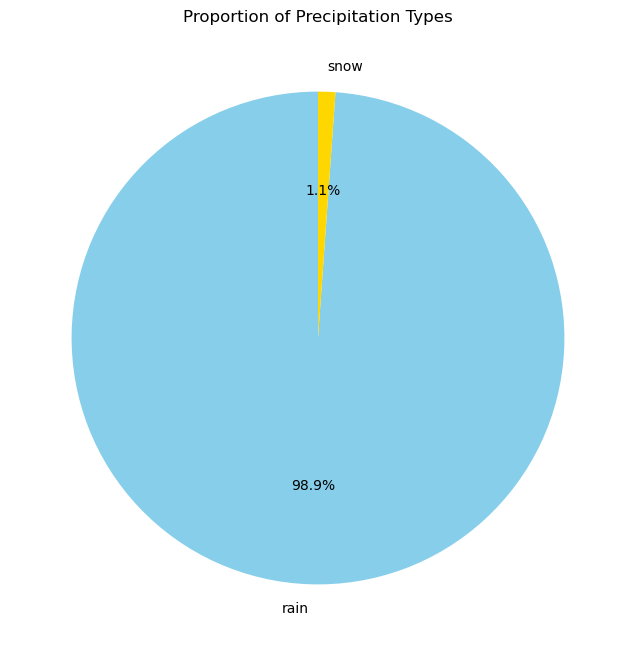

In [ ]:
precip_counts = cleaned_weather_daily['PrecipitationType'].value_counts()

precip_counts.plot.pie(
    autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['#87CEEB', '#FFD700']
)
plt.title('Proportion of Precipitation Types')
plt.ylabel('')
plt.show()

<Figure size 1000x800 with 0 Axes>

Text(0.5, 1.0, 'Proportion of Icon Types')

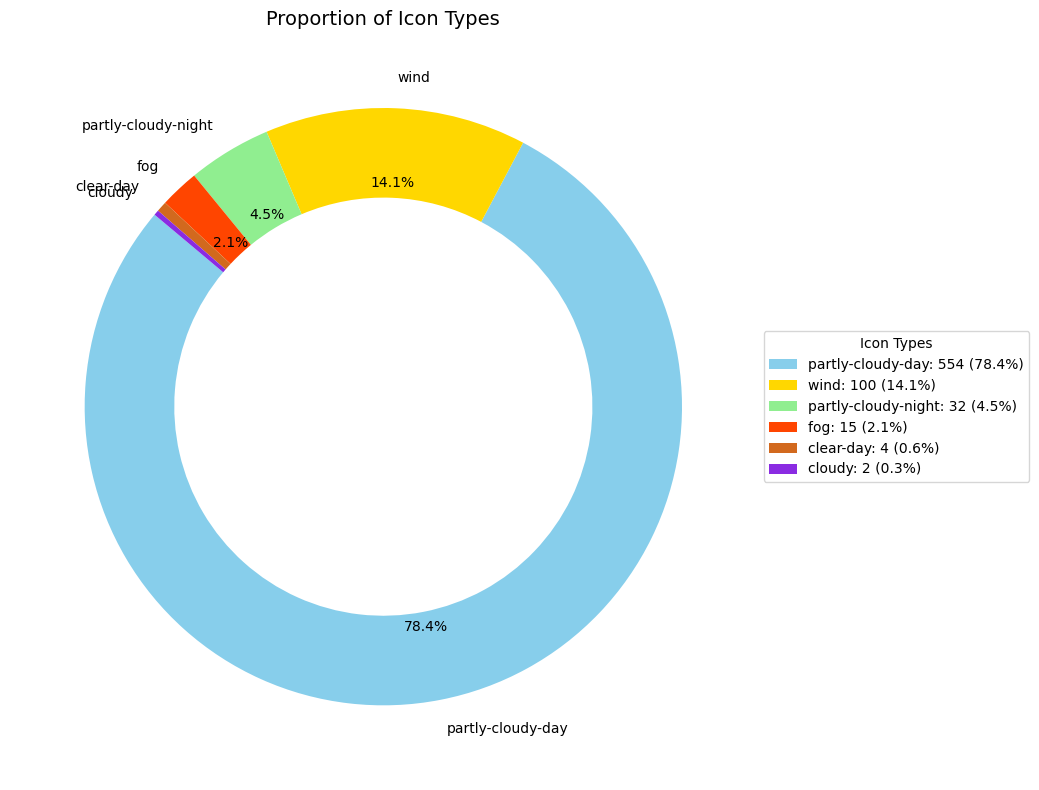

In [ ]:
icon_counts = cleaned_weather_daily['icon'].value_counts()

colors = ['#87CEEB', '#FFD700', '#90EE90', '#FF4500', '#D2691E', '#8A2BE2']

plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    icon_counts,
    labels=icon_counts.index,
    autopct=lambda p: f'{p:.1f}%' if p > 2 else '',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.3),
    textprops={'fontsize': 10},
    pctdistance=0.75
)

for i, (w, a) in enumerate(zip(wedges, autotexts)):
    if icon_counts.values[i] / sum(icon_counts) <= 0.02:
        x, y = w.theta2, w.theta1
        connection_angle = (x + y) / 2
        a.set_position([1.3 * w.r * a.get_position()[0], 1.3 * w.r * a.get_position()[1]])
        a.set_color("black")
        a.set_fontsize(10)

plt.legend(
    wedges,
    [f"{icon}: {count} ({count / sum(icon_counts) * 100:.1f}%)"
     for icon, count in zip(icon_counts.index, icon_counts.values)],
    title="Icon Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)

plt.title('Proportion of Icon Types', fontsize=14)

plt.tight_layout()
plt.show()


In [ ]:
cleaned_weather_hourly_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_weather_hourly.csv"
cleaned_weather_hourly = pd.read_csv(cleaned_weather_hourly_path)

print(cleaned_weather_hourly.info())
print(cleaned_weather_hourly.describe())
print(cleaned_weather_hourly.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21003 entries, 0 to 21002
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   visibility           21003 non-null  float64
 1   windBearing          21003 non-null  int64  
 2   temperature          21003 non-null  float64
 3   time                 21003 non-null  object 
 4   dewPoint             21003 non-null  float64
 5   pressure             21003 non-null  float64
 6   apparentTemperature  21003 non-null  float64
 7   windSpeed            21003 non-null  float64
 8   precipType           21003 non-null  object 
 9   icon                 21003 non-null  object 
 10  humidity             21003 non-null  float64
 11  summary              21003 non-null  object 
 12  windChillEffect      21003 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 2.1+ MB
None
         visibility   windBearing   temperature      dewPoint      pressur

In [ ]:
cleaned_daily_data_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_daily_data.csv"
cleaned_daily_data = pd.read_csv(cleaned_daily_data_path)

print(cleaned_daily_data.info())
print(cleaned_daily_data.describe())
print(cleaned_daily_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3510433 entries, 0 to 3510432
Data columns (total 10 columns):
 #   Column         Dtype  
---  ------         -----  
 0   LCLid          object 
 1   day            object 
 2   energy_median  float64
 3   energy_mean    float64
 4   energy_max     float64
 5   energy_count   int64  
 6   energy_std     float64
 7   energy_sum     float64
 8   energy_min     float64
 9   energy_range   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 267.8+ MB
None
       energy_median   energy_mean    energy_max  energy_count    energy_std  \
count   3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06  3.510433e+06   
mean    1.587391e-01  2.117301e-01  8.345197e-01  4.780364e+01  1.725386e-01   
std     1.701858e-01  1.908452e-01  6.683129e-01  2.810982e+00  1.528902e-01   
min     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%     6.700000e-02  9.808333e-02  3.460000e-01  4.800000e+01  6.928909e-02   
50

In [1]:
import pandas as pd

weather_daily_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_weather_daily.csv"
energy_daily_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/cleaned_daily_data.csv"
acorn_house_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/acorn_house_merge.csv"

cleaned_weather_daily = pd.read_csv(weather_daily_path)
cleaned_daily_data = pd.read_csv(energy_daily_path)
acorn_house_merge = pd.read_csv(acorn_house_path)

cleaned_weather_daily['Date'] = pd.to_datetime(cleaned_weather_daily['Date']).dt.date
cleaned_daily_data['day'] = pd.to_datetime(cleaned_daily_data['day']).dt.date

weather_energy_merged = pd.merge(
    cleaned_weather_daily,
    cleaned_daily_data,
    left_on='Date',
    right_on='day',
    how='inner'
)

final_merged_data = pd.merge(
    weather_energy_merged,
    acorn_house_merge,
    on='LCLid',
    how='left'
)

final_merged_path = "/Users/emre/Desktop/ai_da_jamk/currentai/data/processed/final_merged_data.csv"
final_merged_data.to_csv(final_merged_path, index=False)

print(final_merged_data.info())
print(final_merged_data.head())


: 